# Reconstructing a Helix in 3D

In [4]:
using Revise, TaD, LinearAlgebra, Plots

## N=100 Steps

In [ ]:
n = 100
helix = construct_helix(n)
tangents = construct_helix_tangents(n)
Curve = reconstruct_trajectory(tangents)

plot(Curve, label="Reconstructed BSpline Curve")
plot!(tuple(eachcol(helix)...), label="Original Helix")

## N=1,000 Steps

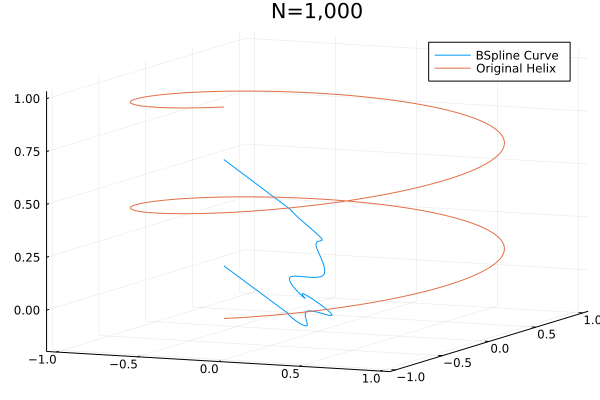

In [27]:
n = 1000
helix = construct_helix(n)
Curve = reconstruct_trajectory(helix)
plot(Curve, label="BSpline Curve", title="N=1,000")
plot!(tuple(eachcol(helix)...), label="Original Helix")

# Error Analysis

## Optimal Order

Using the L2 Error as measured by LinearAlgebras norm(), there is almost no increase in accuracy from using higher basis orders, given sufficiently large N > 1000

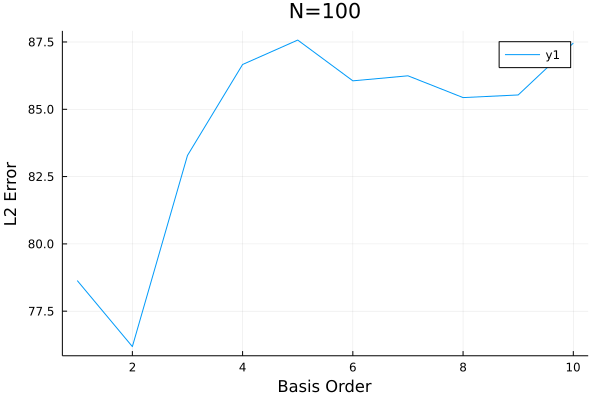

In [28]:
orders = [1 2 3 4 5 6 7 8 9 10]
errors = zeros(length(orders))
for (i, order) in enumerate(orders)
    helix = construct_helix(100)
    Curve = reconstruct_trajectory(helix, order)
    evals = evaluate(Curve, length(helix[:,1]))
    errors[i] = cumsum(L2error(Curve, helix))[end];#norm(helix-evals)
end
plot(errors, ylabel="L2 Error", xlabel="Basis Order", title="N=100")

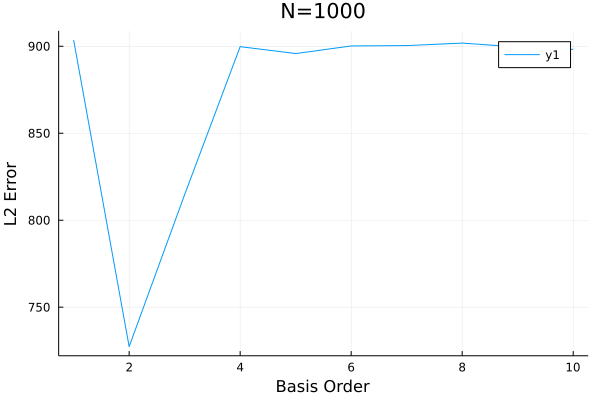

In [29]:
orders = [1 2 3 4 5 6 7 8 9 10]
errors = zeros(length(orders))
for (i, order) in enumerate(orders)
    helix = construct_helix(1000)
    Curve = reconstruct_trajectory(helix, order)
    evals = evaluate(Curve, length(helix[:,1]))
    errors[i] = cumsum(L2error(Curve, helix))[end];#norm(helix-evals)
end
plot(errors, ylabel="L2 Error", xlabel="Basis Order", title="N=1000")

### Error Analysis using 'Norm' from LinearAlgebra.jl

In [30]:
#resolutions = 100:100:5000
#scaled_norm = zeros(length(collect(resolutions)))
#for (i, resolution) in enumerate(resolutions)
#    helix = construct_helix(resolution)
#    Curve = reconstruct_trajectory(helix)
#    evals = evaluate(Curve, length(helix[:,1]))
#    scaled_norm[i] = norm(helix-evals)/resolution
#end
#Note - this is wrong

In [31]:
#plot(resolutions, scaled_norm, label="Error", title="Error (Norm) vs Number of Steps", xlabel="Number of Steps", xticks=0:500:5000)

### Error Analysis using L2 Norm

In [ ]:
#The cumulative sum of the error in each dimension
resolutions = 100:100:5000
scaled_L2 = zeros(length(collect(resolutions)))
for (i, resolution) in enumerate(resolutions)
    helix = construct_helix(resolution)
    Curve = reconstruct_trajectory(helix)
    evals = evaluate(Curve, length(helix[:,1]))
    error = cumsum(L2error(Curve, helix))[end]/resolution;
    scaled_L2[i] = error
end

In [ ]:
plot(resolutions, scaled_L2, label="Error", title="Error (L2 Norm) vs Number of Steps", xlabel="Number of Steps", xticks=0:500:5000)